In [1]:
!wget https://github.com/TomTomen/py/raw/refs/heads/main/Common%20genes%204%20strains%20Pseudomonas.xlsx

--2024-10-25 07:10:28--  https://github.com/TomTomen/py/raw/refs/heads/main/Common%20genes%204%20strains%20Pseudomonas.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TomTomen/py/refs/heads/main/Common%20genes%204%20strains%20Pseudomonas.xlsx [following]
--2024-10-25 07:10:29--  https://raw.githubusercontent.com/TomTomen/py/refs/heads/main/Common%20genes%204%20strains%20Pseudomonas.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13025 (13K) [application/octet-stream]
Saving to: ‘Common genes 4 strains Pseudomonas.xlsx.3’

Common genes 4 stra 100%[===================>]  12.72K  --.-KB/s

In [2]:
!wget https://github.com/TomTomen/py/raw/refs/heads/main/Gene%20presence%20absence.xlsx

--2024-10-25 07:10:29--  https://github.com/TomTomen/py/raw/refs/heads/main/Gene%20presence%20absence.xlsx
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TomTomen/py/refs/heads/main/Gene%20presence%20absence.xlsx [following]
--2024-10-25 07:10:29--  https://raw.githubusercontent.com/TomTomen/py/refs/heads/main/Gene%20presence%20absence.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 303610 (296K) [application/octet-stream]
Saving to: ‘Gene presence absence.xlsx.3’

Gene presence absen 100%[===================>] 296.49K  --.-KB/s    in 0.03s   

2024-10-25 07:10:29 (10.7 MB/s) - ‘Gene prese

In [3]:
import pandas as pd
# Чтение и преобразование таблицы в DataFrame с отбором значимых данных
df_cleaned = pd.read_excel("/content/Gene presence absence.xlsx", sheet_name='gene_presence_absence')

# Удалим строки, содержащие NaN в ключевых столбцах, и переименуем заголовки
#df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])
#df_cleaned = df_cleaned.rename(columns={'Unnamed: 1': 'Strain'})

# Посмотрим на преобразованные данные
df_cleaned.head(10)

,Gene/Protein,product,P_PLB05,P_oryz,P_psych,P_rhyz
0,tuf,NaN,1,1,1,1
1,WP_137279155.1,NaN,1,1,1,1
2,WP_007160292.1,NaN,1,1,1,1
3,WP_007161933.1,co-chaperone GroES,1,1,1,1
4,purU,NaN,1,1,1,1
5,motA,NaN,1,1,1,1
6,hisB,NaN,1,1,1,1
7,WP_007160356.1,DUF2802 domain-containing protein,1,1,1,1
8,hda,NaN,1,1,1,1
9,ftsH,NaN,1,1,1,1


In [4]:
df_cleaned[df_cleaned['P_PLB05'] != 0][['Gene/Protein', 'P_PLB05']]
#set(df_cleaned[df_cleaned['P_PLB05'] != 0]['Gene/Protein'])

,Gene/Protein,P_PLB05
0,tuf,1
1,WP_137279155.1,1
2,WP_007160292.1,1
3,WP_007161933.1,1
4,purU,1
...,...,...
6052,WP_231357468.1,1
7148,WP_231357421.1,1
7460,WP_231357422.1,1
7879,WP_231357418.1,1


In [6]:
genes_PLB05 = 1537
genes_P_rhyz = 2934
genes_P_oryz = 340
genes_P_psych = 956

# Overlap data
overlap_PLB05_P_rhyz = 1736
overlap_PLB05_P_oryz = 2907
overlap_PLB05_P_psych = 3055
overlap_P_rhyz_P_oryz = 1863
overlap_P_rhyz_P_psych = 1832
overlap_P_oryz_P_psych = 4196

In [5]:
genes_PLB05_s = set(df_cleaned[df_cleaned['P_PLB05'] != 0]['Gene/Protein'])
genes_P_oryz_s = set(df_cleaned[df_cleaned['P_oryz'] != 0]['Gene/Protein'])
genes_P_psych_s = set(df_cleaned[df_cleaned['P_psych'] != 0]['Gene/Protein'])
genes_P_rhyz_s = set(df_cleaned[df_cleaned['P_rhyz'] != 0]['Gene/Protein'])

In [7]:
!pip install venn
from venn import venn,generate_petal_labels,draw_venn,generate_colors
import matplotlib.pyplot as plt

Изначальные метки для лепестков: {'0001': '2934', '0010': '956', '0011': '22', '0100': '340', '0101': '59', '0110': '1221', '0111': '84', '1000': '1537', '1001': '10', '1010': '158', '1011': '6', '1100': '16', '1101': '0', '1110': '1171', '1111': '1720'}


<Figure size 1000x800 with 0 Axes>

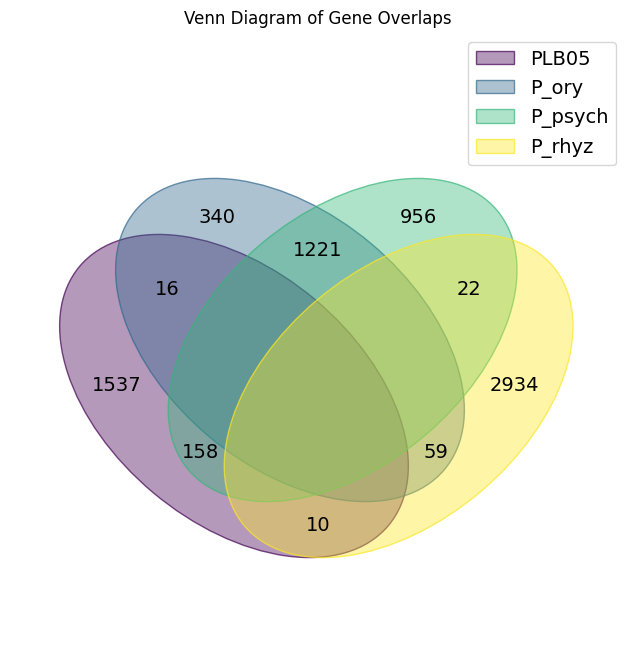

In [15]:
venn_data = {
    'PLB05': genes_PLB05_s,
    'P_ory': genes_P_oryz_s,
    'P_psych': genes_P_psych_s,
    'P_rhyz': genes_P_rhyz_s,
}
petal_labels = generate_petal_labels(venn_data.values(), fmt="{size}")
print("Изначальные метки для лепестков:", petal_labels)

filtered_labels = {}
for logic, value in list(petal_labels.items()):
    if logic.count("1") > 2:
        filtered_labels[logic] = petal_labels.pop(logic)
filtered_labels

for logic in list(filtered_labels.keys()):
    del filtered_labels[logic]

plt.figure(figsize=(10, 8))
draw_venn(
    petal_labels=petal_labels,
    dataset_labels=venn_data.keys(),
    hint_hidden=False,
    colors=generate_colors(n_colors=4),
    figsize=(8, 8),
    fontsize=14,
    legend_loc="best",
    ax=None
)
plt.title("Venn Diagram of Gene Overlaps")
plt.show()


<Figure size 1000x800 with 0 Axes>

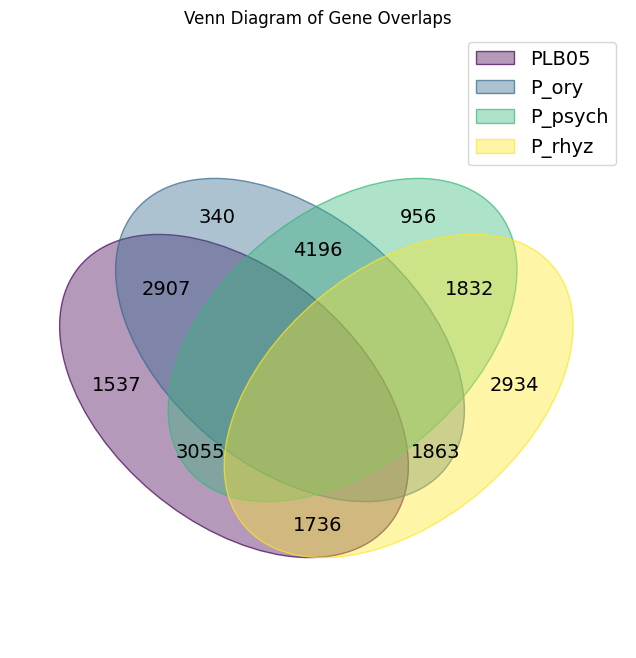

In [17]:
venn_data = {
    'PLB05': genes_PLB05_s,
    'P_ory': genes_P_oryz_s,
    'P_psych': genes_P_psych_s,
    'P_rhyz': genes_P_rhyz_s,
}

#custom_petal_labels = {}
#names = list(venn_data.keys())
#for logic in list(petal_labels.keys()):
#    index = logic.count('1')  # Определяем количество пересечений
#    if index > 0:
#        indices = [i for i, char in enumerate(logic) if char == '1']
#        involved_names = [names[i] for i in indices]
#        name = "_".join(involved_names)
#        custom_petal_labels[name] = f"{petal_labels[logic]}"



petal_labels = {
  '1000': str(genes_PLB05),
  '0100': str(genes_P_oryz),
  '0010': str(genes_P_psych),
  '0001': str(genes_P_rhyz),
  '1100': str(overlap_PLB05_P_oryz),
  '1010': str(overlap_PLB05_P_psych),
  '1001': str(overlap_PLB05_P_rhyz),
  '0110': str(overlap_P_oryz_P_psych),
  '0101': str(overlap_P_rhyz_P_oryz),
  '0011': str(overlap_P_rhyz_P_psych),
  '1110': str(0),
  '1101': str(0),
  '1011': str(0),
  '0111': str(0),
  '1111': str(0)
}

significance_filter = lambda value: value if int(value) != 0 else ""
petal_labels = {
    logic: significance_filter(value)
    for logic, value in petal_labels.items()
}


plt.figure(figsize=(10, 8))
draw_venn(
    petal_labels=petal_labels,
    dataset_labels=venn_data.keys(),
    hint_hidden=False,
    colors=generate_colors(n_colors=4),
    figsize=(8, 8),
    fontsize=14,
    legend_loc="best",
    ax=None
)
plt.title("Venn Diagram of Gene Overlaps")
plt.show()

In [ ]:

petal_labels = {
  '1000': str(genes_PLB05),
  '0100': str(genes_P_oryz),
  '0010': str(genes_P_psych),
  '0001': str(genes_P_rhyz),
  '1100': str(overlap_PLB05_P_oryz),
  '1010': str(overlap_PLB05_P_psych),
  '1001': str(overlap_PLB05_P_rhyz),
  '0110': str(overlap_P_oryz_P_psych),
  '0101': str(overlap_P_rhyz_P_oryz),
  '0011': str(overlap_P_rhyz_P_psych),
  '1110': str(0),
  '1101': str(0),
  '1011': str(0),
  '0111': str(0),
  '1111': str(0)
}